Conexion a la API de Kaggle, importacion del archivo, importacion de las librerias a utilizar y creacion de un Pandas dataframe

In [ ]:
#pip install kaggle

In [ ]:
#Coneccion a la API de Kaggle con nombre de usuario y clave
import os
os.environ['KAGGLE_USERNAME'] = "xxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxx"

In [ ]:
#se importa el archivo de datos comprimido desde Kaggle
!kaggle datasets download -d cnic92/200-financial-indicators-of-us-stocks-20142018

 34% 5.00M/14.8M [00:00<00:00, 35.9MB/s]
100% 14.8M/14.8M [00:00<00:00, 76.2MB/s]


In [ ]:
#se descomprimen los archivos
!unzip /content/200-financial-indicators-of-us-stocks-20142018.zip

Archive:  /content/200-financial-indicators-of-us-stocks-20142018.zip
  inflating: 2014_Financial_Data.csv  
  inflating: 2015_Financial_Data.csv  
  inflating: 2016_Financial_Data.csv  
  inflating: 2017_Financial_Data.csv  
  inflating: 2018_Financial_Data.csv  


In [ ]:
# importamos las librerias que usaremos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #para graficar
import sklearn
from sklearn.impute import KNNImputer #para realizar la imputacion de valores por knn

In [ ]:
#Se leen los datos de 2017

df=pd.read_csv('/content/2017_Financial_Data.csv')
df.head(2)

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
1       VIPS  1.102060e+10          0.3525     8.557810e+09  2.462794e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  1.865400e+10        1.865400e+10      1.376600e+10   
1  2.733452e+08  8.201852e+08        2.056136e+09      4.066575e+08   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      4.650000e+08  ...              0.0505           -0.0195       -0.0529   
1      1.245995e+07  ...              0.9219            0.4764        0.5889   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.0012       0.0325              0.0000   
1                       1.5821       0.3805              0.2141   

   SG&A Expenses Growth              Sector  2018 PRICE VAR [%]  Class  
0               -0.0156  Consumer Defensive            4.975151      1  
1                0.1920  Consumer Defensive          -56.320000      0  

[2 rows x 225 columns]

Dimensiones del dataframe

In [ ]:
#dimensiones del dataframe 4960 filas x 225 columnas
num_filas, num_columnas = df.shape

# imprimir las dimensiones del DataFrame
print('El DataFrame tiene {} filas y {} columnas.'.format(num_filas, num_columnas))

El DataFrame tiene 4960 filas y 225 columnas.


In [ ]:
#lista de todas las columnas del dataframe
columnas = df.columns.tolist()

Se renombra la primer columna

In [ ]:
#vemos los nombre de la primer columna
df.columns[0]

'Unnamed: 0'

In [ ]:
#renombramos la primer columna
df=df.rename(columns={'Unnamed: 0': 'EMPRESA'})
df.columns[0]

'EMPRESA'

Identificacion de las variables de tipo object y no object

In [ ]:
num_vars_objeto = len(df.dtypes[df.dtypes == 'object'])
num_vars_no_objeto = len(df.columns) - num_vars_objeto
print("Número de variables objeto = {}\nCantidad de variables no objeto = {}".format(num_vars_objeto, num_vars_no_objeto))

Número de variables objeto = 2
Cantidad de variables no objeto = 223


Recategorizacion de las variables objeto a numericas

In [ ]:
#Mostramos las variables que son objeto
vars_objeto = df.select_dtypes(include=['object']).columns
print(vars_objeto)

Index(['EMPRESA', 'Sector'], dtype='object')


In [ ]:
#buscamos las categorias unicas que tiene la variable objeto Sector
pd.unique(df['Sector'])

array(['Consumer Defensive', 'Basic Materials', 'Healthcare',
       'Consumer Cyclical', 'Industrials', 'Real Estate',
       'Communication Services', 'Energy', 'Financial Services',
       'Utilities', 'Technology'], dtype=object)

In [ ]:
#Recategorizamos la categoria sector en categorias numericas. Guardamos en un diccionario la relacion de numero a denominacion de la categoría
sector_dic={"Consumer Defensive":0,"Basic Materials":1,"Healthcare":2, "Consumer Cyclical":3,"Industrials":4,"Real Estate":5,"Communication Services":6,"Energy":7,"Financial Services":8,"Utilities":9,"Technology":10}
df['Sector'].replace({"Consumer Defensive":0,"Basic Materials":1,"Healthcare":2, "Consumer Cyclical":3,"Industrials":4,"Real Estate":5,"Communication Services":6,"Energy":7,"Financial Services":8,"Utilities":9,"Technology":10},  inplace = True)

In [ ]:
df['Sector']

0        0
1        0
2        0
3        0
4        0
        ..
4955    10
4956    10
4957    10
4958    10
4959    10
Name: Sector, Length: 4960, dtype: int64

In [ ]:
#Vemos los valores unicos de la variable Empresa y contamos los elementos de esta array
#Comprobamos que hay una empresa por fila

empresas=pd.unique(df['EMPRESA'])
print('La cantidad de empresas unicas en el dataframe es:',len(empresas))

La cantidad de empresas unicas en el dataframe es: 4960


In [ ]:
#Recategorizamos la variable Empresa a numerica para anonimizar los datos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['EMPRESA'] = le.fit_transform(df['EMPRESA'])

In [ ]:
#contamos las variables de tipo objeto en el dataframe y comprobamos que no hay ninguna

num_objetos = len(df.select_dtypes(include='object').columns)
print(f'Hay {num_objetos} variables que son objetos en el DataFrame')

Hay 0 variables que son objetos en el DataFrame


Verificacion de valores faltantes y de cantidad de variables con valores faltantes

In [ ]:
#vemos los valores faltantes en todas las columnas como son muchas uso display max rows
pd.set_option('display.max_rows', None)
df.isnull().sum()

EMPRESA                                          0
Revenue                                        525
Revenue Growth                                 724
Cost of Revenue                                679
Gross Profit                                   534
R&D Expenses                                   787
SG&A Expense                                   661
Operating Expenses                             661
Operating Income                               504
Interest Expense                               677
Earnings before Tax                            579
Income Tax Expense                             635
Net Income - Non-Controlling int               835
Net Income - Discontinued ops                  835
Net Income                                     620
Preferred Dividends                            835
Net Income Com                                 582
EPS                                            546
EPS Diluted                                    540
Weighted Average Shs Out       

In [ ]:
#contamos cuantas variables de las 225 del dataframe tienen valores faltantes
num_vars_with_nulls = df.isnull().any().sum()
print(f"El DataFrame tiene {num_vars_with_nulls} variables con valores faltantes.")

El DataFrame tiene 221 variables con valores faltantes.


Se crea un nuevo dataframe con las columnas EMPRESA, Revenue, Gross Profit, EBITDA, EBIT, ROE, Sector y Class

In [ ]:
#Creamos un nuevo dataframe con las variables solicitadas:
df2 = df[['EMPRESA','Revenue','Gross Profit','EBITDA','EBIT','ROE','Sector','Class']]
df2.head(5)

EMPRESA       Revenue  Gross Profit        EBITDA          EBIT     ROE  \
0     3534  6.505800e+10  3.242000e+10  2.167400e+10  1.885400e+10  0.2748   
1     4676  1.102060e+10  2.462794e+09  5.622560e+08  4.017881e+08  0.1364   
2     2557  1.153370e+11  2.583500e+10  5.794000e+09  3.454000e+09  0.2949   
3     3740  2.292754e+10  5.064707e+09  6.559220e+08  2.485560e+08  0.0066   
4     1909  1.561980e+10  5.567800e+09  3.211400e+09  2.607800e+09  0.3830   

   Sector  Class  
0       0      1  
1       0      0  
2       0      0  
3       0      0  
4       0      0

Se renombra la columna Gross Profit a Gross_Profit

In [ ]:
#Renombramos la columna Gross Profit a Gross_Profit
df2=df2.rename(columns={'Gross Profit': 'Gross_Profit'})

In [ ]:
df2.head(2)

EMPRESA       Revenue  Gross_Profit        EBITDA          EBIT     ROE  \
0     3534  6.505800e+10  3.242000e+10  2.167400e+10  1.885400e+10  0.2748   
1     4676  1.102060e+10  2.462794e+09  5.622560e+08  4.017881e+08  0.1364   

   Sector  Class  
0       0      1  
1       0      0

Creacion de un profilling Report

In [ ]:
#se crea un profilling report
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.6 MB 22.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=e3a745390a1456143565e4eb44e10af53c8087b8d89f9089ba61539864c61d71
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ir6o0xp/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.1.2
    Uninstalling ydata-profiling-4.1.2:
      Successfully uninstalled ydata-profiling-4.1.2


In [ ]:
!pip install MarkupSafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.3.0 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(df2)

<ipython-input-28-c39a6f8ff52d>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# podemos exportar el reporte en formato html. Luego de descargar el archivo generado, al abrirlo, se nos abre en el navegador
profile=ProfileReport(df2)
profile.to_file('Reporte_2017_financial_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Se crean nuevas variables MARCA_XX (una por cada variable con valores faltantes),la misma vale 1 por fila donde el valor de la variable XX existe y 0 por fila donde el mismo falta. Se verifica para cada variable creada que la cantidad de valores faltantes que posee la variable original es la misma que la de valores cero en la variable creada

In [ ]:
#contamos los valores faltantes por columna (serie)
null_contar =df2.isna().sum()

# calcular el porcentaje de valores nulos por columna (serie)
null_percentajes = null_contar / len(df) * 100

# crear una tabla con los resultados
resultados_faltantes = pd.concat([null_contar, null_percentajes], axis=1, keys=['Valores Nulos', 'Porcentaje'])
resultados_faltantes

Valores Nulos  Porcentaje
EMPRESA                   0    0.000000
Revenue                 525   10.584677
Gross_Profit            534   10.766129
EBITDA                  666   13.427419
EBIT                    592   11.935484
ROE                     841   16.955645
Sector                    0    0.000000
Class                     0    0.000000

In [ ]:
# Creamos una nueva columna 'MARCA_XX' para cada columna que toma el valor 0 cuando hay valores faltantes
#en la variable MARCA y que toma el valor 1 si no los hay en la variable MARCA

# definir una lista de columnas
arreglo = ['Revenue','Gross_Profit','EBITDA','EBIT','ROE']

# crear las nuevas columnas
for col in arreglo:
    df2['MARCA_' + col] = df2[col].notna().astype(int)


In [ ]:
# Verificamos que la cantidad de valores faltantes en la variable original es la misma
#que la de 0 en las nuevas variables creadas

arreglo2 = ['MARCA_Revenue','MARCA_Gross_Profit','MARCA_EBITDA','MARCA_EBIT','MARCA_ROE']
for col in arreglo2:
    num_registros = sum(df2[col] == 0)
    print(f"Numero de filas con 0 en la columna '{col}': {num_registros}")

for col1 in arreglo:
  valores_faltantes=df2[col1].isna().sum()
  print(f"Numero de filas con valores no definidos en la columna '{col1}': {valores_faltantes}")

Numero de filas con 0 en la columna 'MARCA_Revenue': 525
Numero de filas con 0 en la columna 'MARCA_Gross_Profit': 534
Numero de filas con 0 en la columna 'MARCA_EBITDA': 666
Numero de filas con 0 en la columna 'MARCA_EBIT': 592
Numero de filas con 0 en la columna 'MARCA_ROE': 841
Numero de filas con valores no definidos en la columna 'Revenue': 525
Numero de filas con valores no definidos en la columna 'Gross_Profit': 534
Numero de filas con valores no definidos en la columna 'EBITDA': 666
Numero de filas con valores no definidos en la columna 'EBIT': 592
Numero de filas con valores no definidos en la columna 'ROE': 841


Scatterplot de Revenue vs Sector con MARCA_Revenue como clasificadora de los puntos (en el gráfico no apareceran los puntos donde Revenue no esta definida)

In [ ]:
#aplicamos logaritmo a Revenue para mejor visualizacion del grafico
df2['log(Revenue)']=df2['Revenue'].apply(np.log)

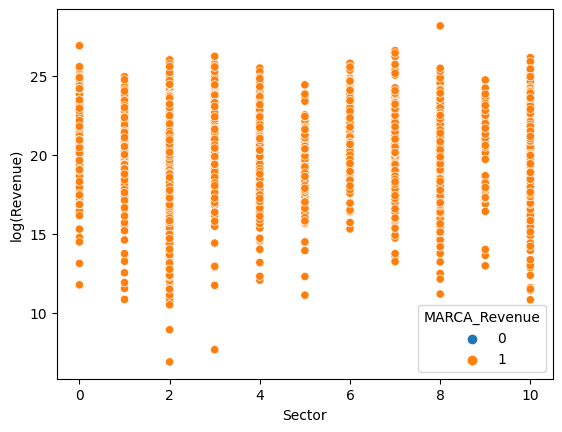

In [ ]:
#Graficamos
sns.scatterplot(x="Sector", y="log(Revenue)", hue="MARCA_Revenue", data=df2)

# Mostramos el gráfico
plt.show()

Se imputan valores faltantes en la variable Revenue por criterio de distancia. Se verifica que el resultado obtenido sea el adecuado

In [ ]:
#Armamos un dataframe que contiene las variables numéricas ( excepto EMPRESA) para que pueda el algoritmo pueda realizar cálculos de distancia
#imputara los valores faltantes de cada una de las 5 variables elegidas por el metodo KNN
#si hubieramos seleccionado solo revenue los valores nulos serian reemplazados por la media de revenue
#en este caso el algoritmo armara la matriz de distancias en un espacio de dimension 5
df3=df2[['Revenue','Gross_Profit','EBITDA','EBIT','ROE']]

In [ ]:
#valores nulos antes de la imputacion
df3.isnull().sum()

Revenue         525
Gross_Profit    534
EBITDA          666
EBIT            592
ROE             841
dtype: int64

In [ ]:
#realizamos la imputación, elegimos 5 vecinos mas cercanos
imp=KNNImputer(n_neighbors=5, weights='distance')
temp=imp.fit_transform(df3.to_numpy())
temp=pd.DataFrame(temp, columns=df3.columns)

In [ ]:
#contamos las variables con valores nulos en el dataframe al que le hicimos la imputacion de valores nulos por KNN
temp.isnull().sum()

Revenue         0
Gross_Profit    0
EBITDA          0
EBIT            0
ROE             0
dtype: int64

Realizamos el scatterplot Sector, log_Revenue (con valortes imputados por KNN y MARCA_Revenue que valdra 0 para los valores imputados y 1 de los restantes

In [ ]:
#aplicamos logaritmo a Revenue para mejor visualizacion del grafico
temp['log(Revenue)']=temp['Revenue'].apply(np.log)

In [ ]:
df4=pd.concat([temp[['Revenue','log(Revenue)']], df2[['Sector','MARCA_Revenue']]], axis=1)

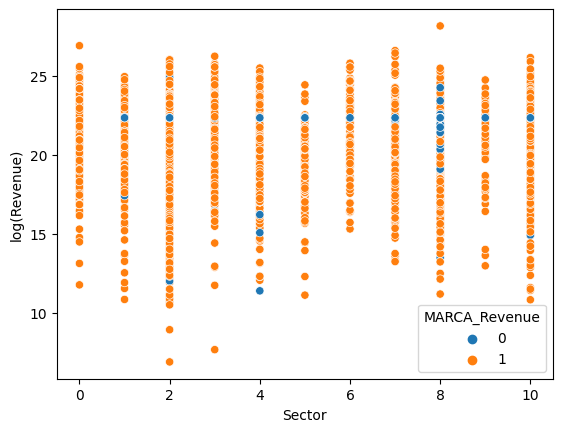

In [ ]:
#Graficamos (los puntos azules representan los puntos con valores imputados)
sns.scatterplot(x="Sector", y="log(Revenue)", hue="MARCA_Revenue", data=df4)

# Mostramos el gráfico
plt.show()

Se realiza el boxplot de la variable log(Revenue) por sector

<Axes: xlabel='Sector', ylabel='log(Revenue)'>

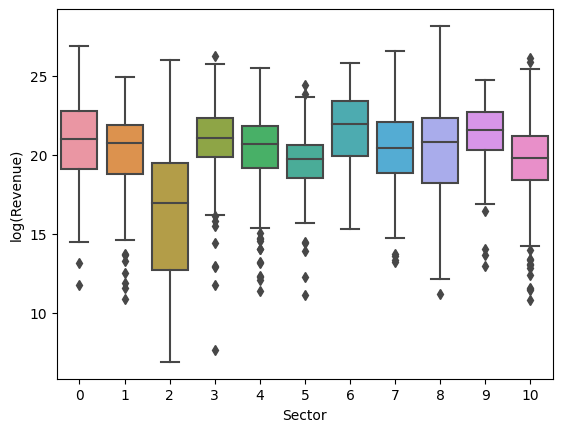

In [ ]:
sns.boxplot(x='Sector', y='log(Revenue)', data=df4)

Deteccion de valores atipicos usando KNN

In [ ]:
!pip install pyod
from pyod.models.knn import KNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=d68ef3415795dd0aeaf79de7f6df0c33e901d6789b877e8e41bb2739cff55448
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod


Se aplica KNN por sector para determinar valores atipicos.Se crea la variable MARCA_XX que vale 1 si es valor atipico y 0 si no lo es

In [ ]:
# Se define la lista de sectores
sectores = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Itera a través de cada sector (buscamos por KNN valores atipicos por sector)
for sec in sectores:

    # Se crea el DataFrame X con los datos de ingreso de la categoría o sector actual
    X = pd.DataFrame(data={'Monto': df4.loc[df4['Sector'] == sec, 'Revenue']})

    # Se crea el modelo KNN y ajustarlo a los datos
    clf = KNN(contamination=0.1)
    clf.fit(X)

    # Se detectan los valores atípicos a la columna MARCA_XX 1 si el valor es atipico y 0 en otro caso
    y_pred = clf.predict(X)
    casos = X[y_pred == 1]
    df4.loc[df4['Sector'] == sec, 'MARCA_Outliers'] = y_pred
    df4.loc[df4['Sector'] == sec, 'MARCA_Outliers'] = df4.loc[df4['Sector'] == sec, 'MARCA_Outliers'].fillna(0)



In [ ]:
V_norm=(df4['MARCA_Outliers']==0).sum()
V_atip=(df4['MARCA_Outliers']==1).sum()
print(f"La cantidad de valores atípicos detectados por el método KNN es: {V_atip}. La cantidad de valores no atípicos es: {V_norm}")


La cantidad de valores atípicos detectados por el método KNN es: 442. La cantidad de valores no atípicos es: 4518


Scatterplot donde en el eje X muestra la variable Sector y el eje Y la variable Revenue con MARCA_XX como variable de clasificacion

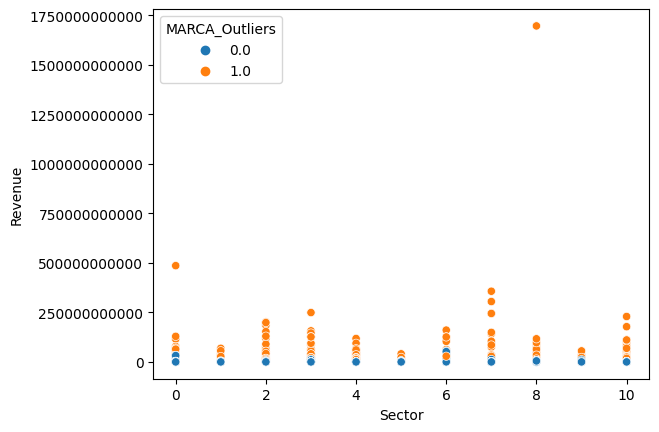

In [ ]:
#Graficamos (los puntos azules representan los puntos con valores atipicos)
sns.scatterplot(x="Sector", y="Revenue", hue="MARCA_Outliers", data=df4)
plt.ticklabel_format(style='plain', axis='y')  #quita la notación científica
# Mostramos el gráfico
plt.show()

In [ ]:
df4.columns

Index(['Revenue', 'log(Revenue)', 'Sector', 'MARCA_Revenue', 'MARCA_Outliers'], dtype='object')

In [ ]:
df5=pd.concat([df2[['EMPRESA','Sector','Class']],temp[['Revenue','Gross_Profit','EBITDA','EBIT','ROE']], df4[['MARCA_Revenue','MARCA_Outliers']]], axis=1)

Se guarda el csv

In [ ]:
# guardar el dataframe como archivo CSV
df5.to_csv('Profit1.csv', index=True)

Creación de base de datos SQL y consultas de empresas por sector. Casos imputados por sector

In [ ]:
import sqlite3 as sql
from pandas_datareader import data as pdr

In [ ]:
#se crea la conexion a la base de datos
conexión = sql.connect("Profit_empresas.db")

In [ ]:
import pandas.io.sql as pd_sql


In [ ]:
#se almacena el DataFrame como tabla en la base creada
#Profit es el nombre de la tabla creada en la base de datos Profit_Empresas
pd_sql.to_sql(df5,'Profit', conexión, index=False)

4960

In [ ]:
ge=conexión.execute(''' SELECT Sector, COUNT(DISTINCT EMPRESA) AS Cantidad_de_Empresas
FROM Profit
GROUP BY Sector''')

In [ ]:
#se convierte a DataFrame asignando nombres a las columnas generadas por el querie
data_sql_1=pd.DataFrame(data=ge, columns=['Sector','Cantidad_de_Empresas'])

data_sql_1

Sector  Cantidad_de_Empresas
0        0                   199
1        1                   282
2        2                   718
3        3                   520
4        4                   595
5        5                   264
6        6                    94
7        7                   266
8        8                  1247
9        9                   110
10      10                   665

In [ ]:
ge=conexión.execute(''' SELECT Sector, COUNT(CASE WHEN MARCA_Revenue=0 THEN EMPRESA END) AS Cant_Revenue_imputado
FROM Profit
GROUP BY Sector
''')

In [ ]:
data_sql_2=pd.DataFrame(data=ge, columns=['Sector','Cant_Revenue_imputado'])

data_sql_2

Sector  Cant_Revenue_imputado
0        0                      0
1        1                      3
2        2                     14
3        3                      6
4        4                     25
5        5                      6
6        6                      2
7        7                      8
8        8                    454
9        9                      2
10      10                      5

In [ ]:
conexión.close()